In [1]:
import pandas as pd
import numpy as np

In [2]:
data_file = 'data/hon_eats_data.json'

# Load Data

In [3]:
df = pd.read_json(data_file)
df.shape

(15903, 21)

In [4]:
df.head()

,restaurant_name,description,url,top_details,about,price,diets,meals,cuisines,features,...,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url,review_data
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",https://www.tripadvisor.com/Restaurant_Review-...,,None,None,None,"Breakfast, Lunch, Dinner",None,None,...,NaN,NaN,NaN,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,"[{'user_name': 'waynen95', 'bubble_rating': 4...."
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,None,None,None,None,Reservations,...,NaN,NaN,NaN,NaN,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': '28franniel', 'bubble_rating': ..."
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$ | Vietnamese,None,None,None,"Lunch, Dinner",Vietnamese,None,...,NaN,NaN,NaN,NaN,5.0,"#903 of 1,581 Restaurants in Honolulu","2227 S Beretania St, Honolulu, Oahu, HI 96826-...",1.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'Amy M', 'bubble_rating': 5.0, ..."
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,None,None,"Breakfast, Lunch, Dinner",None,None,...,NaN,NaN,NaN,NaN,8.0,"#749 of 1,581 Restaurants in Honolulu","949 Auahi St, Honolulu, Oahu, HI 96814",1.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'vrite', 'bubble_rating': 4.0, ..."
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...",https://www.tripadvisor.com/Restaurant_Review-...,,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,2.0,"#1,040 of 1,581 Restaurants in Honolulu","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'bobika', 'bubble_rating': 5.0,..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15903 entries, 0 to 15902
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_name    15903 non-null  object 
 1   description        15903 non-null  object 
 2   url                15903 non-null  object 
 3   top_details        15903 non-null  object 
 4   about              4299 non-null   object 
 5   price              5857 non-null   object 
 6   diets              12153 non-null  object 
 7   meals              12898 non-null  object 
 8   cuisines           14884 non-null  object 
 9   features           9387 non-null   object 
 10  overall_rating     15653 non-null  float64
 11  food_rating        14855 non-null  float64
 12  service_rating     14860 non-null  float64
 13  value_rating       14862 non-null  float64
 14  atmosphere_rating  12972 non-null  float64
 15  num_reviews        15653 non-null  float64
 16  ranking            155

# Unnest Review Data

## Get Rows with Nonzero Reviews

In [6]:
df_nonzero_reviews = df[(df['review_data'].apply(lambda x: len(x))>=1) 
                        & (~df['num_reviews'].isnull())].copy()
df_nonzero_reviews.head()

,restaurant_name,description,url,top_details,about,price,diets,meals,cuisines,features,...,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url,review_data
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",https://www.tripadvisor.com/Restaurant_Review-...,,None,None,None,"Breakfast, Lunch, Dinner",None,None,...,NaN,NaN,NaN,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,"[{'user_name': 'waynen95', 'bubble_rating': 4...."
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,None,None,None,None,Reservations,...,NaN,NaN,NaN,NaN,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': '28franniel', 'bubble_rating': ..."
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$ | Vietnamese,None,None,None,"Lunch, Dinner",Vietnamese,None,...,NaN,NaN,NaN,NaN,5.0,"#903 of 1,581 Restaurants in Honolulu","2227 S Beretania St, Honolulu, Oahu, HI 96826-...",1.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'Amy M', 'bubble_rating': 5.0, ..."
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...",https://www.tripadvisor.com/Restaurant_Review-...,$$ - $$$,None,None,None,"Breakfast, Lunch, Dinner",None,None,...,NaN,NaN,NaN,NaN,8.0,"#749 of 1,581 Restaurants in Honolulu","949 Auahi St, Honolulu, Oahu, HI 96814",1.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'vrite', 'bubble_rating': 4.0, ..."
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...",https://www.tripadvisor.com/Restaurant_Review-...,,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,2.0,"#1,040 of 1,581 Restaurants in Honolulu","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,"[{'user_name': 'bobika', 'bubble_rating': 5.0,..."


In [7]:
# Get subset of columns
df_reviews = df_nonzero_reviews[['url', 'review_data']]
df_reviews.head()

,url,review_data
0,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'waynen95', 'bubble_rating': 4...."
1,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': '28franniel', 'bubble_rating': ..."
2,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'Amy M', 'bubble_rating': 5.0, ..."
3,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'vrite', 'bubble_rating': 4.0, ..."
4,https://www.tripadvisor.com/Restaurant_Review-...,"[{'user_name': 'bobika', 'bubble_rating': 5.0,..."


In [8]:
# Unnest
df_reviews_unnested = pd.concat(df_reviews['review_data'].apply(pd.DataFrame).tolist(),
          keys=df_reviews["url"]).reset_index(level="url")
df_reviews_unnested.shape

(147951, 4)

In [9]:
# Drop duplicate rows
df_reviews_unnested.drop_duplicates(inplace=True)
df_reviews_unnested.shape

(147938, 4)

In [10]:
# Include more columns for merging later
df_reviews_full = pd.merge(df_nonzero_reviews[['restaurant_name', 'description', 
                                               'address', 'url']], df_reviews_unnested, on='url')
print(df_reviews_full.shape)
df_reviews_full.head()

(147938, 7)


,restaurant_name,description,address,url,user_name,bubble_rating,review_contents
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...
1,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,Maria H,5.0,Friendly and a good selection of beers and. Li...
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...
3,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,Kim J,5.0,If you are looking for a fun night out with li...
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...


# Clean Up Restaurant Data

In [11]:
df_restaurants = df_nonzero_reviews.drop(columns=['url', 'review_data'])
df_restaurants.shape

(15653, 19)

In [12]:
# Drop duplicate rows
df_restaurants.drop_duplicates(inplace=True)
df_restaurants.shape

(1557, 19)

In [13]:
df_restaurants.head()

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,None,None,"Breakfast, Lunch, Dinner",None,None,5.0,NaN,NaN,NaN,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",$$ - $$$,None,None,None,None,None,Reservations,4.0,NaN,NaN,NaN,NaN,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...",$$ - $$$ | Vietnamese,None,None,None,"Lunch, Dinner",Vietnamese,None,4.5,NaN,NaN,NaN,NaN,5.0,"#903 of 1,581 Restaurants in Honolulu","2227 S Beretania St, Honolulu, Oahu, HI 96826-...",1.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...",$$ - $$$,None,None,None,"Breakfast, Lunch, Dinner",None,None,4.5,NaN,NaN,NaN,NaN,8.0,"#749 of 1,581 Restaurants in Honolulu","949 Auahi St, Honolulu, Oahu, HI 96814",1.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...",,None,None,None,None,None,None,5.0,NaN,NaN,NaN,NaN,2.0,"#1,040 of 1,581 Restaurants in Honolulu","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...


## Check Unique Values

In [14]:
df_restaurants.nunique()

restaurant_name      1382
description          1556
top_details           465
about                  77
price                 145
diets                  11
meals                  75
cuisines              338
features              259
overall_rating          9
food_rating             6
service_rating          6
value_rating            6
atmosphere_rating       7
num_reviews           305
ranking              1497
address              1365
location              111
image_url            1256
dtype: int64

## Check Null Values

In [15]:
df_restaurants.isna().sum()

restaurant_name         0
description             0
top_details             0
about                1478
price                1287
diets                1223
meals                 432
cuisines              429
features             1091
overall_rating          0
food_rating           765
service_rating        759
value_rating          761
atmosphere_rating    1154
num_reviews             0
ranking                 3
address                 0
location              110
image_url               0
dtype: int64

#### Handling Null Values
* about - Disregard column
* price, diets, meals, cuisines, features - **Fill with empty string**
* rating columns (4) - *Impute later*
* ranking - **Investigate**
* location - **Fill with empty string**

### Fill Null Columns with ''

In [16]:
null_cols = ['price', 'diets', 'meals', 'cuisines', 
             'features', 'location']

In [17]:
for col in null_cols:
    df_restaurants[col].fillna('', inplace=True)

### Drop Null Rankings

In [18]:
df_restaurants[df_restaurants['ranking'].isna()==True]

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,food_rating,service_rating,value_rating,atmosphere_rating,num_reviews,ranking,address,location,image_url
149,"Real a Gastropub, Honolulu","Real a Gastropub, Honolulu: See 100 unbiased r...",$$ - $$$ | American | Bar | International,None,,,"Lunch, Dinner, Late Night, Drinks","American, Bar, Pub, International",,4.5,4.5,4.5,4.0,4.5,100.0,None,"1020 Auahi St, Honolulu, Oahu, HI 96814-4134",1.2 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...
7431,"Top of Waikiki, Honolulu","Reserve a table at Top of Waikiki, Honolulu on...",$$$$ | American | Fusion | Vegetarian Friendly,Top of Waikiki offers one of the most amazing ...,$25 - $40,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night, Drinks","American, Fusion","Reservations, Seating, Parking Available, Serv...",4.0,4.0,4.0,3.5,4.0,1598.0,None,"2270 Kalakaua Ave Ste 1800, Honolulu, Oahu, HI...",0.5 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...
9808,Viaggio Honolulu Italian Restaurant,"Viaggio Honolulu Italian Restaurant, Honolulu:...",$$ - $$$ | Italian | Bar | Seafood,None,$14 - $58,,"Dinner, Late Night, Drinks","Italian, Bar, Seafood, European, Pub, Diner, S...",,3.5,NaN,NaN,NaN,NaN,14.0,None,"888 Kapiolani Blvd, Honolulu, HI 96813 Corner ...",1.0 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...


In [19]:
# Drop all 3 restaurants above, confirmed they are CLOSED on Tripadvisor
df_restaurants.drop(index=df_restaurants[df_restaurants['ranking'].isna()==True].index, 
                    inplace=True)
df_restaurants.shape

(1554, 19)

### Re-Check Nulls

In [20]:
df_restaurants.isna().sum()

restaurant_name         0
description             0
top_details             0
about                1476
price                   0
diets                   0
meals                   0
cuisines                0
features                0
overall_rating          0
food_rating           764
service_rating        758
value_rating          760
atmosphere_rating    1153
num_reviews             0
ranking                 0
address                 0
location                0
image_url               0
dtype: int64

## Geocode Addresses - TODO

In [21]:
df_address = df_restaurants[['restaurant_name', 'description', 'address']]

In [22]:
df_address.head()

,restaurant_name,description,address
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117"
1,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...","1115 Bethel St, Honolulu, Oahu, HI 96813-2202"
2,"Cafe Anasia, Honolulu","Cafe Anasia, Honolulu: See 5 unbiased reviews ...","2227 S Beretania St, Honolulu, Oahu, HI 96826-..."
3,"Starbucks, Honolulu","Starbucks, Honolulu: See 8 unbiased reviews of...","949 Auahi St, Honolulu, Oahu, HI 96814"
4,"La Vela Wine & Spa, Honolulu","La Vela Wine & Spa, Honolulu: See 2 unbiased r...","2375 Ala Wai Blvd Waikiki Sand Villa Hotel, Ho..."


# Merge Cleaned Restaurant & Review Data

In [23]:
df_full = pd.merge(df_restaurants, df_reviews_full, 
                   on=['restaurant_name', 'description', 'address'])
df_full.shape

(147742, 23)

In [24]:
df_full.head()

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,atmosphere_rating,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...
1,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,Maria H,5.0,Friendly and a good selection of beers and. Li...
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...
3,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,Kim J,5.0,If you are looking for a fun night out with li...
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...


In [25]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147742 entries, 0 to 147741
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   restaurant_name    147742 non-null  object 
 1   description        147742 non-null  object 
 2   top_details        147742 non-null  object 
 3   about              41227 non-null   object 
 4   price              147742 non-null  object 
 5   diets              147742 non-null  object 
 6   meals              147742 non-null  object 
 7   cuisines           147742 non-null  object 
 8   features           147742 non-null  object 
 9   overall_rating     147742 non-null  float64
 10  food_rating        144799 non-null  float64
 11  service_rating     144836 non-null  float64
 12  value_rating       144857 non-null  float64
 13  atmosphere_rating  127662 non-null  float64
 14  num_reviews        147742 non-null  float64
 15  ranking            147742 non-null  object 
 16  ad

# EDA

In [26]:
df_full.sample(20)

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,atmosphere_rating,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents
100717,"Fook Yuen Seafood Restaurant, Honolulu","Fook Yuen Seafood Restaurant, Honolulu: See 32...",$$ - $$$ | Chinese | Seafood | Asian,None,,Vegetarian Friendly,"Dinner, Lunch, Late Night","Chinese, Seafood, Asian","Takeout, Seating, Parking Available, Highchair...",4.0,...,3.0,324.0,"#199 of 1,581 Restaurants in Honolulu","1960 Kapiolani Blvd Suite 200, Honolulu, Oahu,...",1.3 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,69tiger888,3.0,You need to go to this place early ( open at 5...
4849,"The Counter, Honolulu","Order food online at The Counter, Honolulu wit...",$$ - $$$ | American | Bar | Vegetarian Friendly,None,,"Vegetarian Friendly, Gluten Free Options","Lunch, Dinner, Brunch, Late Night","American, Bar",,4.0,...,3.5,210.0,"#149 of 1,581 Restaurants in Honolulu","4211 Waialae Ave # E-1, Honolulu, Oahu, HI 968...",1.6 miles from Diamond Head State Monument,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,kupunakane,3.0,There have been a number of changes since our ...
17353,"Duke's Waikiki, Honolulu","Order food online at Duke's Waikiki, Honolulu ...",$$ - $$$ | American | Seafood | Hawaiian,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Late Night, ...","American, Seafood, Hawaiian","Takeout, Outdoor Seating, Seating, Television,...",4.5,...,4.5,15028.0,"#25 of 1,581 Restaurants in Honolulu","2335 Kalakaua Ave Ste 116, Honolulu, Oahu, HI ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,adrianaf114,4.0,Great breakfast. \nThe service is outstanding....
23646,"Duke's Waikiki, Honolulu","Order food online at Duke's Waikiki, Honolulu ...",$$ - $$$ | American | Seafood | Hawaiian,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Late Night, ...","American, Seafood, Hawaiian","Takeout, Outdoor Seating, Seating, Television,...",4.5,...,4.5,15028.0,"#25 of 1,581 Restaurants in Honolulu","2335 Kalakaua Ave Ste 116, Honolulu, Oahu, HI ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,888lizil,4.0,Duke's is a local favorite. That should say a...
18649,"Duke's Waikiki, Honolulu","Order food online at Duke's Waikiki, Honolulu ...",$$ - $$$ | American | Seafood | Hawaiian,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Late Night, ...","American, Seafood, Hawaiian","Takeout, Outdoor Seating, Seating, Television,...",4.5,...,4.5,15028.0,"#25 of 1,581 Restaurants in Honolulu","2335 Kalakaua Ave Ste 116, Honolulu, Oahu, HI ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,StevenL_11,5.0,We hadn’t been to Duke’s in over 10 years. We ...
137459,"Roy's Waikiki Beach, Honolulu","Reserve a table at Roy's Waikiki Beach, Honolu...",$$$$ | Japanese | American | Seafood,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...",,"Japanese, American, Seafood, Sushi, Polynesian...",,4.5,...,4.0,3365.0,"#19 of 1,581 Restaurants in Honolulu","226 Lewers St, Honolulu, Oahu, HI 96815-1941",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,jayeisinger,3.0,After we had refused to sit at the worst table...
106994,"Hawaii Sushi, Honolulu","Hawaii Sushi, Honolulu: See 50 unbiased review...",$ | Japanese | Seafood | Sushi,None,,Vegetarian Friendly,"Lunch, Dinner","Sushi, Japanese, Seafood, Asian",,5.0,...,NaN,50.0,"#160 of 1,581 Restaurants in Honolulu","3045 Monsa

# Part I: Popularity Recommender

# Part II: Content-Based Recommender

# Part III: Collaborative Filtering Recommender

## Drop Rows with Null Usernames

In [27]:
df_nonnull_users = df_full.drop(index=df_full[df_full['user_name'].isnull()].index).copy()

In [28]:
df_nonnull_users.head()

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,atmosphere_rating,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...
1,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,Maria H,5.0,Friendly and a good selection of beers and. Li...
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...
3,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,Kim J,5.0,If you are looking for a fun night out with li...
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,NaN,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...


## Drop Rows with Usernames Containing Space (Real Names)

In [29]:
df_nonnull_users['invalid_username'] = 0

In [30]:
df_nonnull_users.loc[df_nonnull_users[df_nonnull_users['user_name'].str.contains(' ')].index, 'invalid_username'] = 1

In [31]:
df_nonnull_users.sample(10)

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents,invalid_username
38008,"Appetito Craft Pizza and Wine Bar, Honolulu",Order food online at Appetito Craft Pizza and ...,$$ - $$$ | Italian | Pizza | Wine Bar,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Wine Bar, Italian, Pizza","Takeout, Reservations, Outdoor Seating, Seatin...",4.0,...,213.0,"#148 of 1,581 Restaurants in Honolulu","150 Kaiulani Ave, Honolulu, Oahu, HI 96815-3227",0.3 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Fujimi O,5.0,"Nice atmosphere, good food, happy hour is real...",1
87526,"Chef Chai, Honolulu","Order food online at Chef Chai, Honolulu with ...",$$$$ | Asian | Vegetarian Friendly | Vegan Opt...,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night",Asian,,4.5,...,227.0,"#6 of 1,581 Restaurants in Honolulu","1009 Kapiolani Blvd, Honolulu, Oahu, HI 96814-...",1.2 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,davidhgill,5.0,Our very demanding party of four was was wanti...,0
69744,"Arancino di Mare, Honolulu","Reserve a table at Arancino di Mare, Honolulu ...",$$ - $$$ | Italian | Mediterranean | Vegetaria...,Arancino Restaurants has been serving authenti...,$35 - $50,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Late Night","Italian, Mediterranean","Takeout, Reservations, Outdoor Seating, Seatin...",4.0,...,1418.0,"#61 of 1,581 Restaurants in Honolulu",2552 Kalakaua Ave Waikiki Beach Marriott Resor...,0.1 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,949hardys,5.0,"Perfect service, good italian food and good co...",0
9687,"Outback Steakhouse, Honolulu","Order food online at Outback Steakhouse, Honol...",$$ - $$$ | American | Steakhouse,None,,,"Lunch, Dinner, Late Night","American, Steakhouse","Takeout, Reservations, Outdoor Seating, Seatin...",4.0,...,159.0,"#301 of 1,581 Restaurants in Honolulu","6650 Kalanianaole Hwy Hawaii Kai Towne Center,...",1.5 miles from Hanauma Bay Nature Preserve,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,CaptJ03,2.0,I don't know why i keep giving this place anot...,0
131996,"House Without a Key, Honolulu","Reserve a table at House Without a Key, Honolu...",$$$$ | American | Vegetarian Friendly | Vegan ...,*Temporarily closed. Offering daily breakfast ...,$25 - $55,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Late Night, ...",American,"Reservations, Outdoor Seating, Seating, Parkin...",4.5,...,2311.0,"#38 of 1,581 Restaurants in Honolulu","2199 Kalia Rd Halekulani Hotel, Honolulu, Oahu...",0.7 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,Sandal95,5.0,My husband and I went to this restaurant on th...,0
20061,"Duke's Waikiki, Honolulu","Order food online at Duke's Waikiki, Honolulu ...",$$ - $$$ | American | Seafood | Hawaiian,None,,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Brunch, Late Night, ...","American, Seafood, Hawaiian","Takeout, Outdoor Seating, Seating, Television,...",4.5,...,15028.0,"#25 of 1,581 Restaurants in Honolulu","2335 Kalakaua Ave Ste 116, Honolulu, Oahu, HI ...",0.4 miles from Waikiki Beach,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,melaniepB8752HC,3.0,I didn't go to Hawaii so I could sit in the ba...,0
84131,"L & L Hawaiian BBQ, Honolulu","L & L Hawaiian BBQ, Honolulu: See 9 unbiased r...",$ | Barbecue,None,,,"Breakfast, Lunch, Dinner",Barbecue,,3.5,..

In [32]:
df_valid_users = df_nonnull_users[df_nonnull_users['invalid_username']==0].copy()
df_valid_users.shape

(114320, 24)

In [33]:
df_valid_users.head()

,restaurant_name,description,top_details,about,price,diets,meals,cuisines,features,overall_rating,...,num_reviews,ranking,address,location,image_url,url,user_name,bubble_rating,review_contents,invalid_username
0,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,waynen95,4.0,a small pub in Chinatown with great service an...,0
2,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,RowerChicago,5.0,Very casual fun spot for all kinds of hot dogs...,0
4,Hanks Cafe Honolulu,"Hanks Cafe Honolulu, Honolulu: See 5 unbiased ...",,None,,,"Breakfast, Lunch, Dinner",,,5.0,...,5.0,"#943 of 1,581 Restaurants in Honolulu","1038 Nuuanu Ave, Honolulu, Oahu, HI 96817-5117",0.1 miles from Downtown Honolulu,,https://www.tripadvisor.com/Restaurant_Review-...,cg148777,5.0,everytime i visit hanks i have a great meal an...,0
5,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",$$ - $$$,None,,,,,Reservations,4.0,...,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,28franniel,4.0,Our son took us to this new and hip spot to th...,0
6,"Bethel Union, Honolulu","Bethel Union, Honolulu: See 9 unbiased reviews...",$$ - $$$,None,,,,,Reservations,4.0,...,9.0,"#832 of 1,581 Restaurants in Honolulu","1115 Bethel St, Honolulu, Oahu, HI 96813-2202",0.1 miles from Downtown Honolulu,https://media-cdn.tripadvisor.com/media/photo-...,https://www.tripadvisor.com/Restaurant_Review-...,LW811055,4.0,We had side salads and ravioli and florentine ...,0


## Get Subset of Data with Restaurant, User, Rating

In [34]:
df_valid_users_subset = df_valid_users[['restaurant_name', 'user_name', 'bubble_rating']]
df_valid_users_subset.shape

(114320, 3)

In [35]:
df_valid_users_subset.head()

,restaurant_name,user_name,bubble_rating
0,Hanks Cafe Honolulu,waynen95,4.0
2,Hanks Cafe Honolulu,RowerChicago,5.0
4,Hanks Cafe Honolulu,cg148777,5.0
5,"Bethel Union, Honolulu",28franniel,4.0
6,"Bethel Union, Honolulu",LW811055,4.0


In [36]:
n = 5
df_valid_users_subset_grouped = df_valid_users_subset.groupby('user_name').count()['bubble_rating'].reset_index()
df_valid_users_subset_grouped[df_valid_users_subset_grouped['bubble_rating']>=n]

,user_name,bubble_rating
1,-Pikake-too,6
8,007sg,5
16,02b84b52,6
26,05Olga05,6
52,100PENANG,9
...,...,...
55079,zdaati,5
55092,zekimus,16
55122,zillabong,5
55133,zkeeper,11


In [37]:
n = 5
users_min_n_ratings = df_valid_users_subset_grouped[df_valid_users_subset_grouped['bubble_rating']>=n]['user_name'].to_list()
len(users_min_n_ratings)

3998

## Utility Matrix

In [38]:
df_valid_users_subset_min_n_ratings = df_valid_users_subset.loc[df_valid_users_subset['user_name'].isin(users_min_n_ratings)]

In [39]:
utility_df = df_valid_users_subset_min_n_ratings.pivot_table(values='bubble_rating',index='user_name',columns='restaurant_name')
utility_df.shape

(3998, 1160)

In [40]:
utility_df.head()

restaurant_name,"100 Sails Restaurant & Bar, Honolulu","1132 Cafe & Catering, Honolulu","12th Avenue Grill, Honolulu","3 Star Gourmet Restaurant, Honolulu","3660 on the Rise, Honolulu","53 By The Sea, Honolulu","8 Fat Fat 8, Honolulu","8 Half Desserts, Honolulu","99 Local Mix Plate, Honolulu","9bar Hnl, Honolulu",...,"Zippy's Restaurant - Mokauea St, Honolulu","Zippy's Restaurant, Honolulu","Zippy's, Honolulu","Zippys Restaurant 1222 S King St, Honolulu","Zippys Restaurant Dillingham Blvd, Honolulu","Zippy’s Koko Marina, Honolulu","bills Hawaii, Honolulu","d.k Steak House, Honolulu","goofy cafe & dine, Honolulu","kim chee 2, Honolulu"
user_name,,,,,,,,,,,,,,,,,,,,,
-Pikake-too,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
007sg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02b84b52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Olga05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100PENANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Min number of ratings (per user): 1


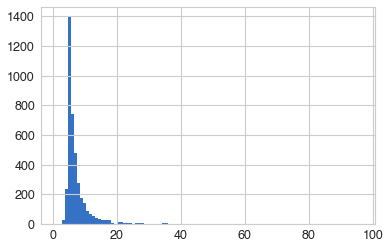

In [41]:
ratings = (utility_df > 0).sum(axis=1)
ratings.hist(bins=100)
print('Min number of ratings (per user): {}'.format(ratings.min()))

Min number of ratings (per restaurant): 1


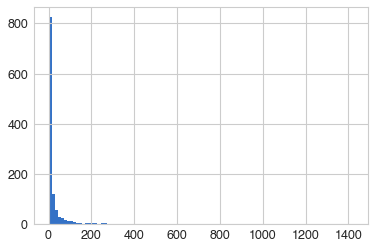

In [42]:
ratings = (utility_df > 0).sum(axis=0)
ratings.hist(bins=100)
print('Min number of ratings (per restaurant): {}'.format(ratings.min()))

In [43]:
number_ratings = (df_valid_users_subset['bubble_rating'] > 0).sum()
density = number_ratings / (utility_df.shape[0] * utility_df.shape[1])
print('The density is: {} '.format(density))

The density is: 0.02465025616256404 
